In [7]:
from wordcloud import WordCloud
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
## read the data
path = "../artifacts/data_ingestion/bongo_scam.csv"
df = pd.read_csv(path)
df.tail()

,Category,Sms
1503,scam,HABARI ZAUKO NI MIMI MWENYE NYUMBA WAKO MNA EN...
1504,trust,Nakupenda sana bro
1505,trust,Nitakutafuta baadaye kwa msaada zaidi wa kifedha.
1506,trust,Watoto wanahitaji uniform mpya kwa ajili ya sh...
1507,trust,Asante kwa kunielewa kila wakati. Upendo wako ...


In [6]:
# ==============================================
# Show Sample messages for Each Label
# ==============================================

def show_samples(df, text_col='Sms', label_col='Category', samples_per_label=3):
    labels = df[label_col].unique()
    for label in labels:
        print(f"\n--- {label} ---")
        samples = df[df[label_col] == label][text_col].sample(min(samples_per_label, len(df[df[label_col] == label])))
        for i, tweet in enumerate(samples, 1):
            print(f"{i}. {tweet}")

show_samples(df)


--- trust ---
1. Kuna msanii mpya anatrend, lakini watu wanasema style yake ni copy ya wengine.
2. Dah, uliona beef ya kina Roma na Fid Q? Wanapashana kweli kwenye Twitter.
3. Tafadhali niambie bei ya bidhaa hizo.

--- scam ---
1. 666,KARIBU FREEMASON UTIMIZE NDOTO KATIKA BIASHARA, KILIMO,UFUGAJI,MACHI MBO,MICHEZO N.K KWAMHITAJI KUJIUNGA PG: 0698945621 AU 0698945621
2. au iyo ela nitumie kwenye m-pesa hii 0698945621 Jina litoke 0698945621.
3. TUMIA NAMBA HII (0787-406-889)KUNITUMIA IYO HELA JINA LITAONYESHA (JUMA SIKAREKO)


Seems like most of the scam messages are tied to prompting sending of money to scammers.

Dataset shape: (1508, 2)
Category
scam     1000
trust     508
Name: count, dtype: int64


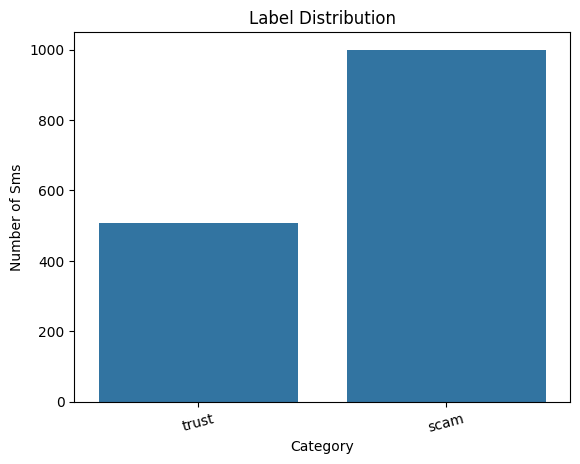

In [ ]:
# ==============================================
# 3. Data Exploration
# ==============================================

print("Dataset shape:", df.shape)
print(df['Category'].value_counts())

# Plot
sns.countplot(x='Category', data=df)

plt.title("Label Distribution")
plt.xlabel("Category")
plt.ylabel("Number of Sms")
plt.xticks(rotation=15)
plt.show()

It is quite interesting that there are more scam messages in the data than ham. Now let us plot a word cloud to see the most common words for each category.

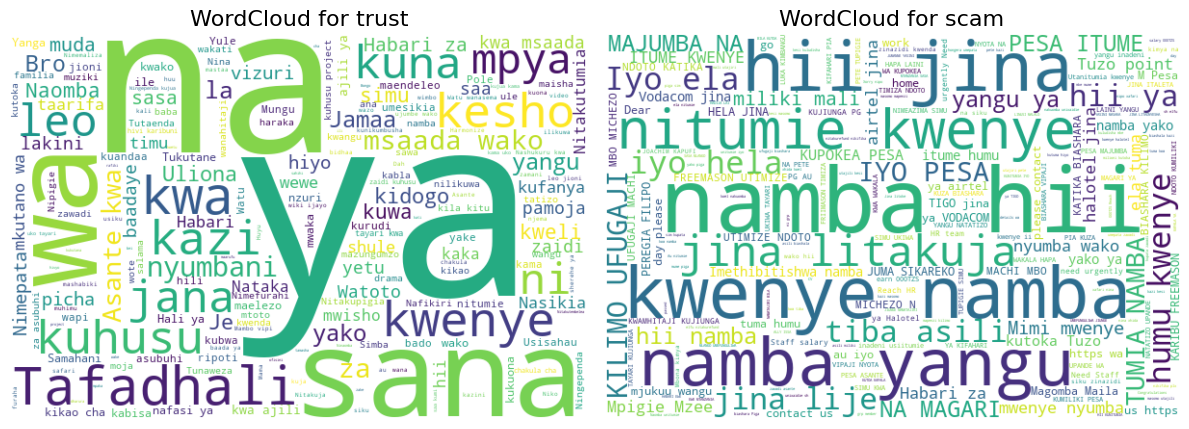

In [11]:
def plot_wordclouds_by_label(df, label_column='Category', text_column='Sms', n_cols=2):
    """
    Plots wordclouds side by side for each label in the dataset.

    Args:
        df (pd.DataFrame): DataFrame containing the data.
        label_column (str): Name of the label column.
        text_column (str): Name of the text column.
        label_mapping (dict): Optional mapping from label integers to string names.
        n_cols (int): Number of columns in the subplot grid.
    """
    labels = df[label_column].unique()
    n_labels = len(labels)
    n_rows = (n_labels + n_cols - 1) // n_cols  # Calculate required rows

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
    axes = axes.flatten()

    for idx, label in enumerate(labels):
        text = " ".join(df[df[label_column] == label][text_column].dropna())

        wordcloud = WordCloud(
            width=600,
            height=400,
            background_color='white',
            colormap='viridis'
        ).generate(text)

        ax = axes[idx]
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis('off')

        title = label
        ax.set_title(f"WordCloud for {title}", fontsize=16)

    # Turn off empty plots if any
    for j in range(idx + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


plot_wordclouds_by_label(df)